#### 2) 词向量/嵌入（Word Embeddings）

* Cosine similarity

In [428]:
%load_ext autoreload 
%autoreload 2 
import usda.pattern_signature as usda_signature
import usda.data_visual as usda_vis 
import usda.utils as usda_utils

import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from torch import nn
import math
from varname import nameof

import gensim
import gensim.downloader as api
from gensim.corpora import Dictionary

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


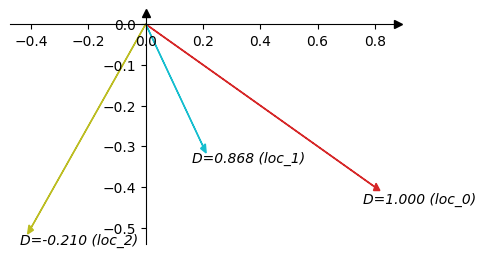

In [288]:
cosine_similarity=nn.CosineSimilarity(dim=0, eps=1e-6)

origin=torch.tensor([0,0],dtype=torch.float64)
location_0=torch.tensor([0.8,-0.4],dtype=torch.float64)
location_1=torch.tensor([0.2,-0.3],dtype=torch.float64)
location_2=torch.tensor([-0.4,-0.5],dtype=torch.float64)
location_dict={'loc_0':location_0,'loc_1':location_1,'loc_2':location_2}
colors=['tab:red','tab:cyan','tab:olive']

fig, ax=plt.subplots(figsize=(5,3))
i=0
for key,loc in location_dict.items():
    distance=cosine_similarity(location_0,loc)
    ax.arrow(*origin,*loc,head_width=0.02, head_length=0.02,color=colors[i])
    ax.text(*loc-0.04,f'D={distance:.3f} ({key})',fontstyle='italic')
    i+=1

usda_vis.plot_style_axis_A(ax)
plt.show()

In [272]:
location_0=torch.tensor([0.8,-0.4,0.5,-0.2,0.3],dtype=torch.float64)
location_1=torch.tensor([0.2,-0.3,0.3,-0.4,0.9],dtype=torch.float64)
location_2=torch.tensor([-0.4,-0.5,-0.2,0.7,-0.1],dtype=torch.float64)

print(f'D(0-1)={cosine_similarity(location_0,location_1)};\nD(0-2)={cosine_similarity(location_0,location_2)}')

D(0-1)=0.658233707531176;
D(0-2)=-0.3683509554826695


In [274]:
model=api.load('glove-wiki-gigaword-50')
print(model["king"])
print(model.most_similar('king'))

[==================================================] 100.0% 66.0/66.0MB downloaded
[ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012  -0.076666  1.493    -0.034189 -0.98173
  0.68229   0.81722  -0.51874  -0.31503  -0.55809   0.66421   0.1961
 -0.13495  -0.11476  -0.30344   0.41177  -2.223    -1.0756   -1.0783
 -0.34354   0.33505   1.9927   -0.04234  -0.64319   0.71125   0.49159
  0.16754   0.34344  -0.25663  -0.8523    0.1661    0.40102   1.1685
 -1.0137   -0.21585  -0.15155   0.78321  -0.91241  -1.6106   -0.64426
 -0.51042 ]
[('prince', 0.8236179351806641), ('queen', 0.7839043140411377), ('ii', 0.7746230363845825), ('emperor', 0.7736247777938843), ('son', 0.766719400882721), ('uncle', 0.7627150416374207), ('kingdom', 0.7542160749435425), ('throne', 0.7539913654327393), ('brother', 0.7492411136627197), ('ruler', 0.7434253692626953)]


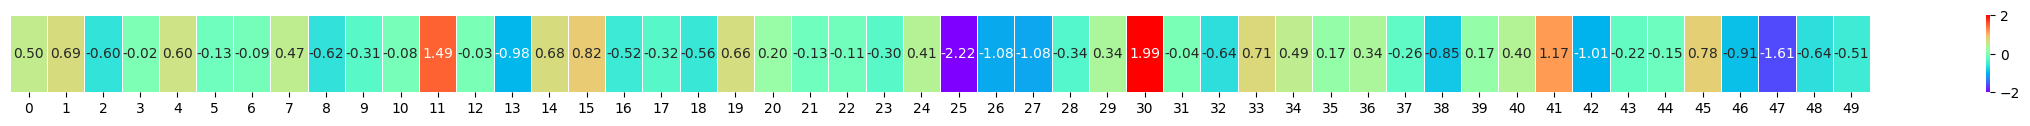

In [359]:
plt.figure(figsize=(30,1))
ax=sns.heatmap([model["king"]], xticklabels=True, yticklabels=False, cbar=True,vmin=-2, vmax=2, linewidths=0.7,cmap='rainbow',annot=True,fmt='.2f')
plt.show()     

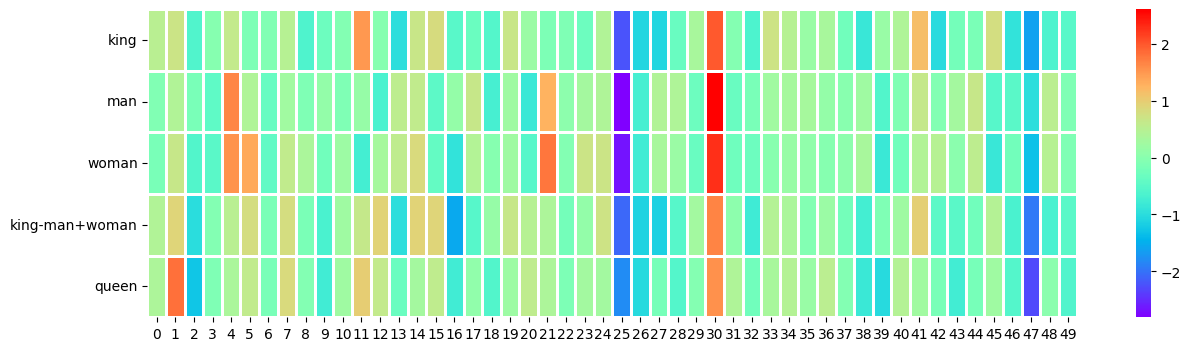

In [363]:
plt.figure(figsize=(15,4))
ax=sns.heatmap([model["king"], 
             model["man"], 
             model["woman"], 
             model["king"] - model["man"] + model["woman"],
             model["queen"],
            ], cbar=True, xticklabels=True, yticklabels=True,linewidths=1,cmap='rainbow') 

ax.set_yticks(np.arange(0.5,5))
ax.set_yticklabels(["king","man","woman","king-man+woman","queen"],rotation=0)
plt.show()

In [431]:
from gensim.utils import tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
stop_words=stopwords.words('english')

corpus_motto=['Do the best you can until you know better. Then when you know better, do better.— Maya Angelou', 
              'Your time is limited so don’t waste it living someone else’s life. – Steve Jobs',
              'Don’t be pushed by your problems. Be led by your dreams. – Ralph Waldo Emerson']

corpus2tokens=lambda corpus: [[word for word in tokenize(sentence) if word not in stopwords.words('english')] for sentence in corpus]
corpus_tokens=corpus2tokens(corpus_motto)
vocab=np.unique(usda_utils.flatten_lst(corpus_tokens))
vocab_size=len(vocab)
print(f'{vocab}\nvocab size={vocab_size}')

['Angelou' 'Be' 'Do' 'Don' 'Emerson' 'Jobs' 'Maya' 'Ralph' 'Steve' 'Then'
 'Waldo' 'Your' 'best' 'better' 'dreams' 'else' 'know' 'led' 'life'
 'limited' 'living' 'problems' 'pushed' 'someone' 'time' 'waste']
vocab size=26


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\richi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [437]:
dct=Dictionary([vocab])
tokens_idx=[[dct.doc2idx([word])[0] for word in doc] for doc in corpus_tokens]
print(tokens_idx)

[[2, 12, 16, 13, 9, 16, 13, 13, 6, 0], [11, 24, 19, 25, 20, 23, 15, 18, 8, 5], [3, 22, 21, 1, 17, 14, 7, 10, 4]]


In [390]:
model.vector_size

50

In [427]:



print(dct.doc2bow(['Maya']),dct.doc2idx(['Maya']))
dct[6]

[(6, 1)] [6]


'Maya'

In [405]:
embedding.weight=nn.Parameter(torch.zeros(10,3))

In [400]:
type(embedding.weight)

torch.nn.parameter.Parameter

In [406]:
embedding=nn.Embedding(10, 3)
embedding.weight=nn.Parameter(torch.zeros(10,3))
print(embedding.weight)
input=torch.LongTensor([[1, 2, 4, 5], [4, 3, 2, 9]])
print(embedding(input))

Parameter containing:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], requires_grad=True)
tensor([[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]], grad_fn=<EmbeddingBackward0>)


#### 3) Word2Vec

In [258]:
location_dict={nameof(var):var for var in [location_0,location_1,location_2]}
location_dict

{'var': tensor([-0.4000, -0.5000], dtype=torch.float64)}

In [ ]:
#ax.set_xticks(np.arange(0.5,model["king"].shape[0]))
#ax.set_xticklabels(np.array(range(model["king"].shape[0])))